In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
f = h5py.File("../data/chuyu_chamber.h5", 'r')

In [3]:
chamber_roi_all = f["chamber_roi_all"]
img_bg_all  = f["image"]
chamber_roi_all

<HDF5 dataset "chamber_roi_all": shape (8, 4608, 5328), type "|u1">

In [4]:
img_bg_all

<HDF5 dataset "image": shape (4608, 5328), type "<f8">

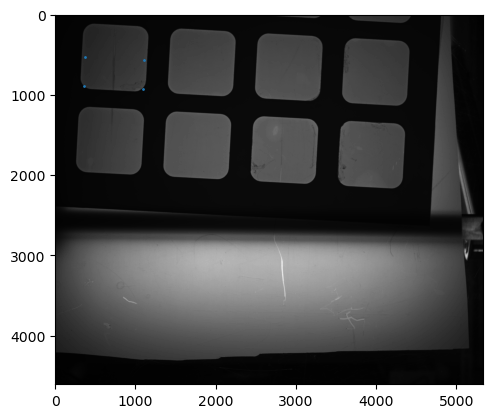

In [5]:
plt.imshow(img_bg_all, cmap="gray")
which_fish = 0


gray = chamber_roi_all[which_fish,:,:].astype(np.uint8)

cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cnts = sorted(cnts[0], key = cv2.contourArea, reverse = True)[:5]

which_contour = 0
contour_x = cnts[which_contour][:,0,0]
contour_y = cnts[which_contour][:,0,1]

rect = cv2.approxPolyDP(cnts[which_contour], 100, True).copy().reshape(-1, 2)


rect_sort_product = rect[np.argsort(rect[:, 0]*rect[:, 1]), :]

rect_sort = np.copy(rect_sort_product)
if rect_sort_product[1,1]<rect_sort_product[2,1]:
    rect_sort[1,:] = rect_sort_product[2,:]
    rect_sort[2,:] = rect_sort_product[1,:]

mid_point_1 = np.mean(rect_sort[0:2,:], axis=0)
mid_point_2 = np.mean(rect_sort[2:,:], axis=0)

roi = np.zeros(gray.shape)

rect_half = np.floor(np.array([mid_point_2, mid_point_1, rect_sort[1,:], rect_sort[3,:]])).astype(np.int32)

cv2.fillPoly(roi, pts=[rect_half], color=(255, 0, 0))



plt.scatter(rect_half[:,0] , rect_half[:,1] , s= 1)

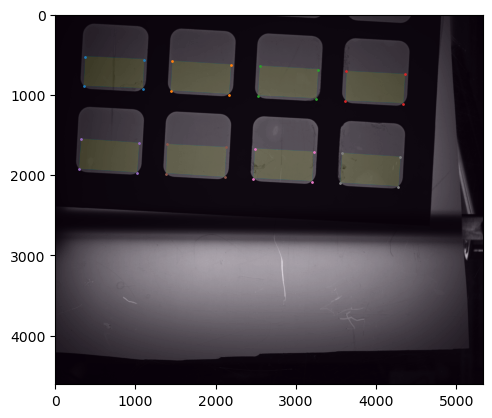

In [6]:
plt.imshow(img_bg_all, cmap="gray")

roi = np.zeros(img_bg_all.shape)
roi_chamber = np.zeros(img_bg_all.shape)

for which_fish in range(chamber_roi_all.shape[0]):
    gray = chamber_roi_all[which_fish,:,:].astype(np.uint8)

    roi_chamber = roi_chamber + gray *255
    
    cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    cnts = sorted(cnts[0], key = cv2.contourArea, reverse = True)[:5]
    
    which_contour = 0
    contour_x = cnts[which_contour][:,0,0]
    contour_y = cnts[which_contour][:,0,1]
    
    rect = cv2.approxPolyDP(cnts[which_contour], 100, True).copy().reshape(-1, 2)
    
    
    rect_sort_product = rect[np.argsort(rect[:, 0]*rect[:, 1]), :]
    
    rect_sort = np.copy(rect_sort_product)
    if rect_sort_product[1,1]<rect_sort_product[2,1]:
        rect_sort[1,:] = rect_sort_product[2,:]
        rect_sort[2,:] = rect_sort_product[1,:]
    
    mid_point_1 = np.mean(rect_sort[0:2,:], axis=0)
    mid_point_2 = np.mean(rect_sort[2:,:], axis=0)
    
    
    rect_half = np.floor(np.array([mid_point_2, mid_point_1, rect_sort[1,:], rect_sort[3,:]])).astype(np.int32)
    
    cv2.fillPoly(roi, pts=[rect_half], color=(255, 0, 0))
    
    plt.scatter(rect_half[:,0] , rect_half[:,1] , s= 1)
plt.imshow(roi, alpha=0.1)

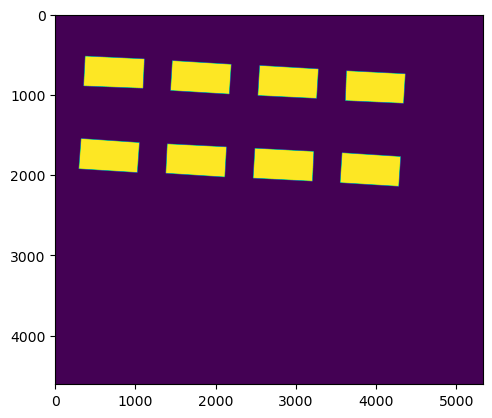

In [7]:
plt.imshow(roi)

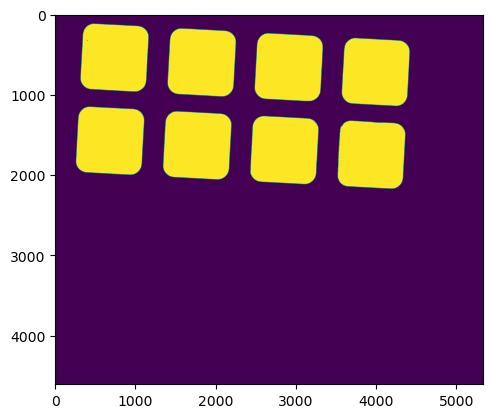

In [8]:
plt.imshow(roi_chamber)

In [9]:
np.save('../data/roi.npy', roi)

In [10]:
np.save('../data/roi_chamber.npy', roi_chamber)